In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Ngưỡng ban đầu và tổng số bước huấn luyện
c0 = 5.0
total_steps = 1000

# Biến global_step
global_step = tf.Variable(0, trainable=False, dtype=tf.float32)

# Tính ngưỡng động
c_dynamic = c0 * (1 - global_step / total_steps)

# Gradient ví dụ
gradient = tf.random.normal([10, 10])
gradient_norm = tf.norm(gradient)

# Clipping gradient với ngưỡng động
clipped_gradient = tf.cond(
    gradient_norm > c_dynamic,
    lambda: c_dynamic / gradient_norm * gradient,
    lambda: gradient
)

# Hàm cập nhật global_step (giả lập tăng bước huấn luyện)
increment_global_step = global_step.assign_add(1)
print(increment_global_step)

# Khởi tạo các biến
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)  # Khởi tạo biến
    for step in range(1000):  # Giả lập 10 bước huấn luyện
        clipped_value, _ = sess.run([clipped_gradient, increment_global_step])
        clipped_norm = sess.run(tf.norm(clipped_value))  # Tính chuẩn sau clipping
        print(f"Step {step}: Clipped Gradient Norm = {clipped_norm}")
              


Instructions for updating:
non-resource variables are not supported in the long term
Tensor("AssignAdd:0", shape=(), dtype=float32_ref)
Step 0: Clipped Gradient Norm = 4.994999885559082
Step 1: Clipped Gradient Norm = 4.994999885559082
Step 2: Clipped Gradient Norm = 4.984999656677246
Step 3: Clipped Gradient Norm = 4.9800004959106445
Step 4: Clipped Gradient Norm = 4.975000381469727
Step 5: Clipped Gradient Norm = 4.970000267028809
Step 6: Clipped Gradient Norm = 4.964999675750732
Step 7: Clipped Gradient Norm = 4.960000038146973
Step 8: Clipped Gradient Norm = 4.954999923706055
Step 9: Clipped Gradient Norm = 4.949999809265137
Step 10: Clipped Gradient Norm = 4.945000171661377
Step 11: Clipped Gradient Norm = 4.940000057220459
Step 12: Clipped Gradient Norm = 4.934999942779541
Step 13: Clipped Gradient Norm = 4.930000305175781
Step 14: Clipped Gradient Norm = 4.925000190734863
Step 15: Clipped Gradient Norm = 4.920000076293945
Step 16: Clipped Gradient Norm = 4.914999485015869
Step 1

In [16]:
import tensorflow as tf
import numpy as np
# Tạo một tensor ví dụ
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Tính tổng toàn bộ tensor
total_sum = tf.reduce_sum(tensor)
print(total_sum)  # Kết quả: 21

# Tính tổng theo chiều 0 (cột)
sum_axis_0 = tf.reduce_sum(tensor, axis=0)
print(sum_axis_0)  # Kết quả: [5 7 9]


# Tính tổng theo chiều 1 (hàng)
sum_axis_1 = tf.reduce_sum(tensor, axis=1)
print(sum_axis_1) # Kết quả: [6 15]

with tf.Session() as sess:
    output = sess.run(sum_axis_0)
    print(output)


Tensor("Sum_15:0", shape=(), dtype=int32)
Tensor("Sum_16:0", shape=(3,), dtype=int32)
Tensor("Sum_17:0", shape=(2,), dtype=int32)
[5 7 9]


In [17]:
import numpy as np
from mlxtend.preprocessing import minmax_scaling

# Dữ liệu ví dụ
data = np.array([1, 2, 3, 4, 5])
scaled_data = minmax_scaling(data, columns=[0])


print("Original Data:", data)
print("Scaled Data:", scaled_data)


Original Data: [1 2 3 4 5]
Scaled Data: [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


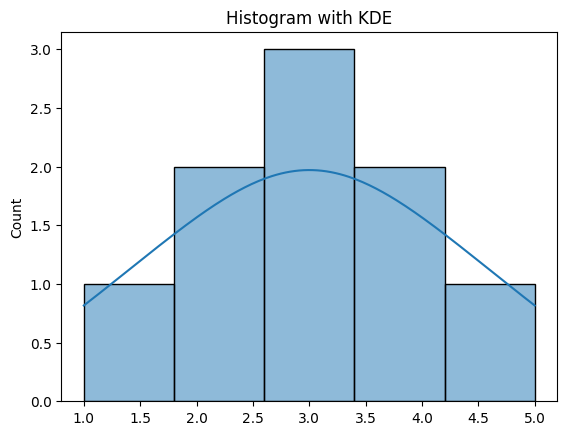

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dữ liệu ví dụ
data = [1, 2, 2, 3, 3, 3, 4, 4, 5]

# Biểu đồ phân phối
sns.histplot(data, kde=True)
plt.title("Histogram with KDE")
plt.show()


In [46]:
import numpy as np
import math
def feature_scaling(data):
	mean = np.mean(data, axis = 0)
	sd = np.std(data,axis = 0)
	standardized_data = (data - mean)/sd
	min,max = np.min(data,axis = 0),  np.max(data,axis = 0)
	normalized_data = (data - min)/ (max - min)
	
	return standardized_data, normalized_data


data = np.array([[1, 2], [3, 4], [5, 6]])
print(feature_scaling(data))



[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]
(array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]]), array([[-1.        , -2.        ],
       [-0.6       , -1.66666667],
       [-0.2       , -1.33333333]]))


In [52]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("C:\\Users\\admin\\Documents\\code\\ML\\data\\ks-projects-201801.csv",encoding="latin1")

print(kickstarters_2017.head())
# set seed for reproducibility
np.random.seed(0)


           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [56]:
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])
print(scaled_data)

        usd_goal_real
0            0.000009
1            0.000180
2            0.000270
3            0.000030
4            0.000117
...               ...
378656       0.000301
378657       0.000009
378658       0.000090
378659       0.000090
378660       0.000012

[378661 rows x 1 columns]


In [57]:
original_data = pd.DataFrame(kickstarters_2017.pledged)
scaled_data = minmax_scaling(original_data, columns=["pledged"])

In [36]:
def feature_scaling(data):
    # Get min and max values
    min_val = min(data)
    max_val = max(data)
    
    # Scale each value
    scaled = [(x - min_val)/(max_val - min_val) for x in data]
    
    # Format to 4 decimal places
    return [f"{x:.4f}" for x in scaled]

# Example usage
data = [1, 5, 3, 9, 2]
print(*feature_scaling(data))

0.0000 0.5000 0.2500 1.0000 0.1250


In [19]:
import tensorflow as tf
tf.disable_v2_behavior()

total_steps = 1000
global_step = tf.Variable(0, trainable= False , dtype=tf.float32)
c = 5.0
c_dynamic = c * (1 - global_step/total_steps)


gradient = tf.random.normal([10,10])
gradient_norm = tf.norm(gradient)

gradient_clipping = tf.cond(gradient_norm > c,
                            lambda: (c/gradient_norm) * gradient,
                            lambda: gradient)


increment_global_step = global_step.assign_add(1)

with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer())
    for step in range(10):
        gradient_clipping, _ = sess.run([gradient_clipping,increment_global_step])
        gradient_clipping = tf.norm(gradient_clipping)
        print(f"step:{step} , gradient = {gradient_clipping.numpy()}")

AttributeError: 'Tensor' object has no attribute 'numpy'